<a href="https://colab.research.google.com/github/yvan0831/Predicting-NBA-Salaries/blob/main/Predicting_NBA_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Making player names the index column 

data = '/content/drive/MyDrive/Coding Dojo/Project 2/2017-18_NBA_salary.csv'
df = pd.read_csv(data, index_col = 'Player')

df.head()

,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,
Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


# Data Cleaning

In [31]:
df_null = df[df['TS%'].isna()]
df_null

,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,
Tyler Lydon,1579440,USA,24,21,DEN,1,2,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-0.016,-5.6,-0.9,-6.5,0.0
Trey McKinney-Jones,46080,USA,62,27,IND,1,1,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-0.001,-5.7,-0.1,-5.9,0.0


The NaN values should be 0

In [32]:
df = df.fillna(0)

In the NBA, injured players still get paid, which might mess with our data, so we need to look for injured players in this data set. How we can do this is to first filter out all the players who have only played a few games. We need to find a fair number of games to start filtering those out.

In [33]:
df_game1 = df[df['G'] <= 20]
df_game1 = df_game1.sort_values('G')
df_game1.head()

,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,
Justin Patton,2247480,USA,16,20,MIN,1,4,19.8,0.500,0.000,0.000,0.0,0.0,0.0,0.0,12.5,0.0,0.0,22.1,0.0,0.0,0.0,0.149,-0.7,4.0,3.2,0.0
Mindaugas Kuzminskas,3025035,Lithuania,62,28,NYK,1,2,-41.1,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.6,0.0,0.0,0.0,-1.063,-36.5,-12.7,-49.2,0.0
Jeremy Lin,12000000,USA,62,29,BRK,1,25,16.0,0.597,0.167,0.583,0.0,0.0,0.0,27.3,0.0,0.0,16.6,31.3,0.0,0.0,0.0,0.087,-3.0,-10.4,-13.4,-0.1
Naz Mitrou-Long,92160,Canada,62,24,UTA,1,1,134.1,1.500,1.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45.1,0.1,0.0,0.1,2.713,68.7,-14.3,54.4,0.0
Jeremy Evans,104059,USA,55,30,ATL,1,5,10.4,1.000,0.000,0.000,22.4,0.0,11.2,0.0,0.0,0.0,50.0,17.5,0.0,0.0,0.0,-0.030,-2.3,-6.1,-8.3,0.0


We still want to keep the bench players in the dataset so without knowing who really is injured we can filter these players with low games AND played with more than a $5 million salary, as healthy players with that high of a salary tend to play more than 20 games per season.

In [34]:
df_game2 = df[(df['G'] <= 20) &  (df['Salary'] >= 5000000)]

df = df.drop(df_game2.index, axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467 entries, Zhou Qi to Aaron Brooks
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Salary           467 non-null    int64  
 1   NBA_Country      467 non-null    object 
 2   NBA_DraftNumber  467 non-null    int64  
 3   Age              467 non-null    int64  
 4   Tm               467 non-null    object 
 5   G                467 non-null    int64  
 6   MP               467 non-null    int64  
 7   PER              467 non-null    float64
 8   TS%              467 non-null    float64
 9   3PAr             467 non-null    float64
 10  FTr              467 non-null    float64
 11  ORB%             467 non-null    float64
 12  DRB%             467 non-null    float64
 13  TRB%             467 non-null    float64
 14  AST%             467 non-null    float64
 15  STL%             467 non-null    float64
 16  BLK%             467 non-null    float64
 17  TOV%  

In [35]:
df.head()

,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,
Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2


In [36]:
df = df.drop(columns = ['NBA_Country'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467 entries, Zhou Qi to Aaron Brooks
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Salary           467 non-null    int64  
 1   NBA_DraftNumber  467 non-null    int64  
 2   Age              467 non-null    int64  
 3   Tm               467 non-null    object 
 4   G                467 non-null    int64  
 5   MP               467 non-null    int64  
 6   PER              467 non-null    float64
 7   TS%              467 non-null    float64
 8   3PAr             467 non-null    float64
 9   FTr              467 non-null    float64
 10  ORB%             467 non-null    float64
 11  DRB%             467 non-null    float64
 12  TRB%             467 non-null    float64
 13  AST%             467 non-null    float64
 14  STL%             467 non-null    float64
 15  BLK%             467 non-null    float64
 16  TOV%             467 non-null    float64
 17  USG%  

Outliers in the PER column

In [37]:
# Outliers have a PER higher than 31 
df = df[df['PER'] < 31]
# Outliers worse than -10 PER
df = df[df['PER'] > -10]
df['PER'].value_counts()

 12.8    7
 12.3    7
 9.1     7
 10.5    6
 16.8    6
        ..
 22.3    1
 20.9    1
 22.6    1
 0.6     1
-3.2     1
Name: PER, Length: 193, dtype: int64

The dataset has a problem where it lists undrafted players as being drafted 62nd overall. The solution is to create a column that shows if the player was drafted (1-60) or undrafted (62)

In [38]:
# How to add a column based on a condition:
# https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

df['Drafted'] = np.where(df['NBA_DraftNumber'] == 62, 0, 1)

In [39]:
df.head(10)

,Salary,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Drafted
Player,,,,,,,,,,,,,,,,,,,,,,,,,,,
Zhou Qi,815615,43,22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2,1
Zaza Pachulia,3477600,42,33,GSW,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7,1
Zach Randolph,12307692,19,36,SAC,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0,1
Zach LaVine,3202217,13,22,CHI,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1,1
Zach Collins,3057240,10,20,POR,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2,1
Yogi Ferrell,1312611,62,24,DAL,79,2238,11.5,0.543,0.489,0.141,1.3,11.3,6.1,13.3,1.4,0.3,9.1,17.0,1.6,1.6,3.1,0.067,-0.4,-0.5,-0.9,0.6,0
Xavier Silas,74159,62,30,BOS,2,7,-4.9,0.000,0.667,0.000,15.9,15.4,15.7,0.0,7.2,0.0,0.0,19.2,-0.1,0.0,0.0,-0.251,-12.6,-0.7,-13.3,0.0,0
Xavier Rathan-Mayes,46080,62,23,MEM,5,118,0.9,0.315,0.333,0.214,0.0,5.0,2.5,23.2,2.6,2.4,19.3,21.7,-0.5,0.1,-0.4,-0.169,-8.7,-1.9,-10.6,-0.3,0
Wilson Chandler,12016854,23,30,DEN,70,2200,11.1,0.543,0.390,0.186,5.0,14.0,9.5,9.7,0.9,1.4,12.0,14.6,2.0,1.0,3.1,0.067,-0.4,-0.6,-1.0,0.5,1


# Exploratory Data Analysis (EDA)

Let's make a histogram of all the nba salaries

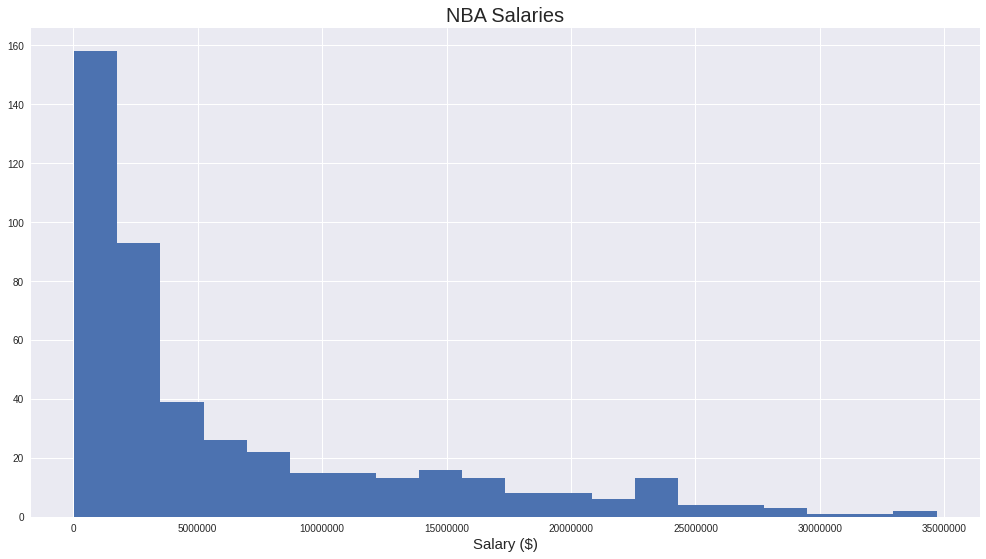

In [40]:
plt.figure(figsize = (17,9))
plt.style.use('seaborn')

plt.hist(df['Salary'], bins = 20)
plt.ticklabel_format(style = 'plain')
plt.title('NBA Salaries', fontsize = 20)
plt.xlabel('Salary ($)', fontsize = 15);

Interesting to note that most players make less than 5 million

PER or Player Efficiency Rating is often used as a metric to determine how good an NBA player is, so let's see if there is a correlation between Salary and PER

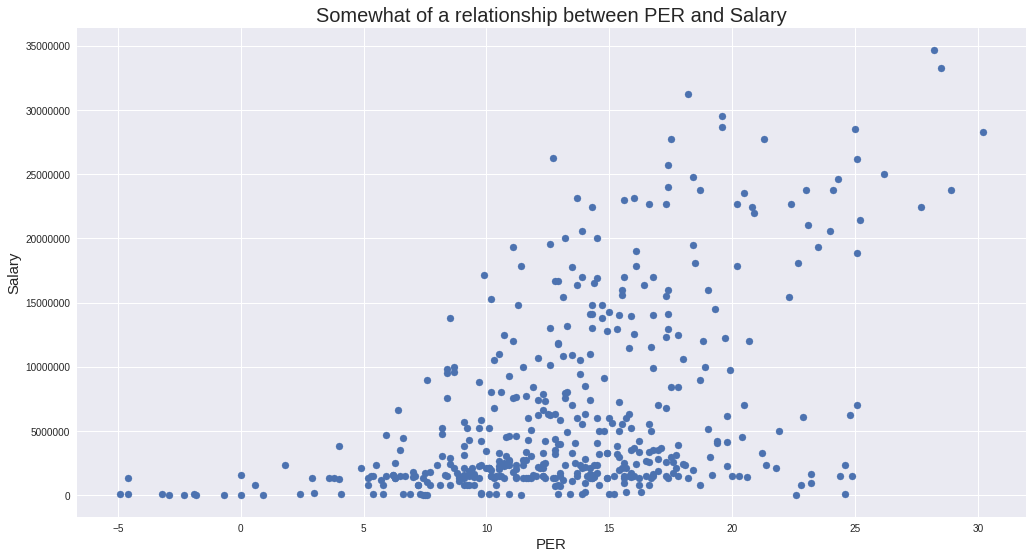

In [41]:
plt.figure(figsize = (17,9))
plt.style.use('seaborn')

plt.scatter(df['PER'], df['Salary'])
plt.ticklabel_format(style = 'plain')
plt.title('Somewhat of a relationship between PER and Salary', fontsize = 20)
plt.xlabel('PER', fontsize = 15)
plt.ylabel('Salary', fontsize = 15);

Let's see the relationship between age and salary

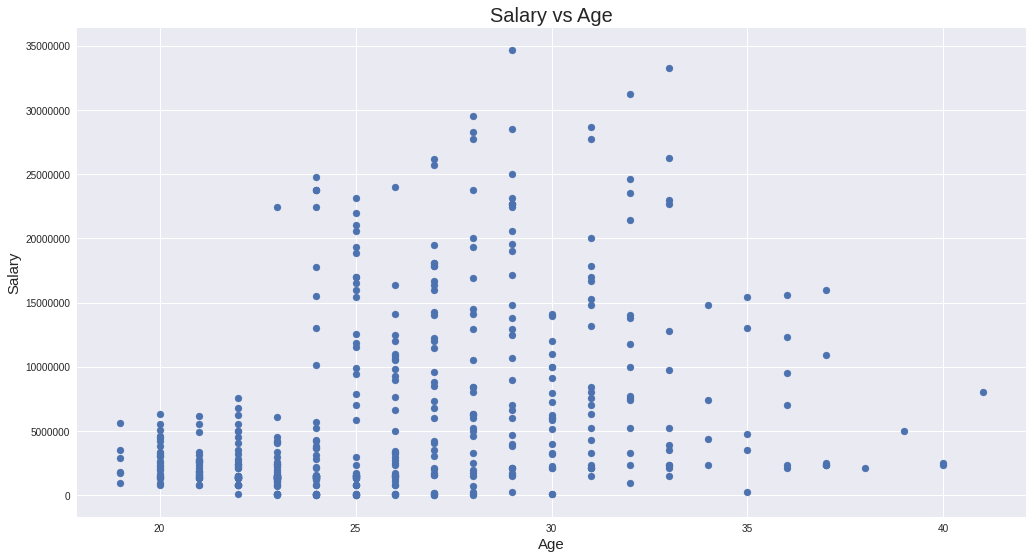

In [42]:
plt.figure(figsize = (17,9))
plt.style.use('seaborn')

plt.scatter(df['Age'], df['Salary'])
plt.ticklabel_format(style = 'plain')
plt.title('Salary vs Age', fontsize = 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Salary', fontsize = 15);

Around the ages of 24 - 33, players are considered to be "in their prime" and players at that age range are getting their contract extensions from their rookie contracts which earns them more money. So this visual makes a lot of sense

Let's do one more chart comparing the number these players were picked in the draft to their salary

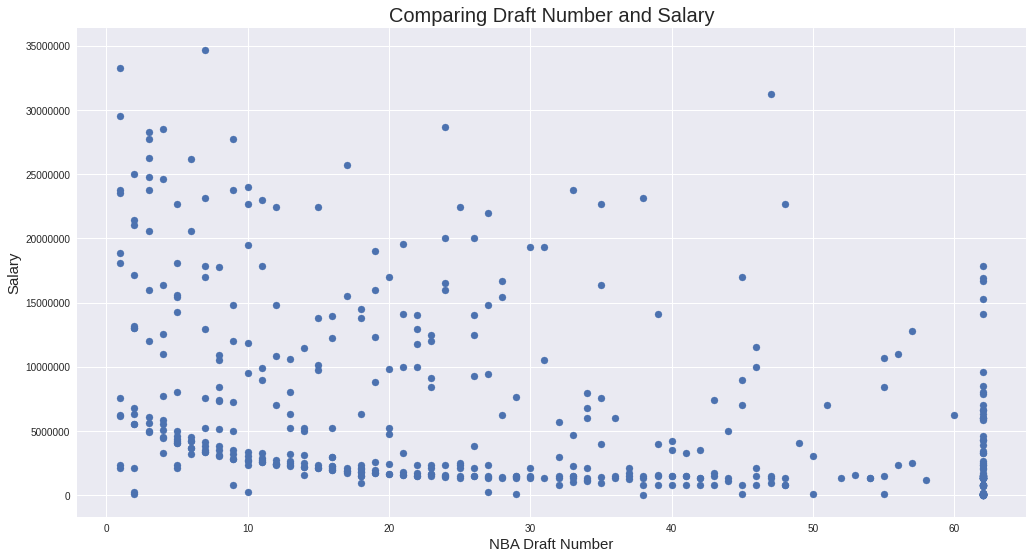

In [43]:
plt.figure(figsize = (17,9))
plt.style.use('seaborn')

plt.scatter(df['NBA_DraftNumber'], df['Salary'])
plt.ticklabel_format(style = 'plain')
plt.title('Comparing Draft Number and Salary', fontsize = 20)
plt.xlabel('NBA Draft Number', fontsize = 15)
plt.ylabel('Salary', fontsize = 15);

The curve in the bottom shows the current players under their rookie contract. The earlier they were drafted the higher their starting salary. And the points after 60 are the undrafted players that were listed as being drafted 62nd.  

# Linear Regression

Without going too much in depth, let's make a simple linear regression model just to see how the data fits in a model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

We need to OHE any columns that are categorical

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, Zhou Qi to Aaron Brooks
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Salary           460 non-null    int64  
 1   NBA_DraftNumber  460 non-null    int64  
 2   Age              460 non-null    int64  
 3   Tm               460 non-null    object 
 4   G                460 non-null    int64  
 5   MP               460 non-null    int64  
 6   PER              460 non-null    float64
 7   TS%              460 non-null    float64
 8   3PAr             460 non-null    float64
 9   FTr              460 non-null    float64
 10  ORB%             460 non-null    float64
 11  DRB%             460 non-null    float64
 12  TRB%             460 non-null    float64
 13  AST%             460 non-null    float64
 14  STL%             460 non-null    float64
 15  BLK%             460 non-null    float64
 16  TOV%             460 non-null    float64
 17  USG%  

In [46]:
df = pd.get_dummies(df, columns = ['Tm'], drop_first = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460 entries, Zhou Qi to Aaron Brooks
Data columns (total 56 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Salary           460 non-null    int64  
 1   NBA_DraftNumber  460 non-null    int64  
 2   Age              460 non-null    int64  
 3   G                460 non-null    int64  
 4   MP               460 non-null    int64  
 5   PER              460 non-null    float64
 6   TS%              460 non-null    float64
 7   3PAr             460 non-null    float64
 8   FTr              460 non-null    float64
 9   ORB%             460 non-null    float64
 10  DRB%             460 non-null    float64
 11  TRB%             460 non-null    float64
 12  AST%             460 non-null    float64
 13  STL%             460 non-null    float64
 14  BLK%             460 non-null    float64
 15  TOV%             460 non-null    float64
 16  USG%             460 non-null    float64
 17  OWS   

Define X and y

In [47]:
X = df.drop(columns = 'Salary')

y = df['Salary']

In [48]:
X.shape

(460, 55)

In [49]:
y.shape

(460,)

Train Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state = 11)

Make the model

In [51]:
linreg = LinearRegression()

In [52]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
print('Training R2:', linreg.score(X_train, y_train))
print('Testing R2:', linreg.score(X_test, y_test))

Training R2: 0.6378391105549083
Testing R2: 0.3465063740084251


This model is very over fitted, which means that the model cannot accurately predict the salaries based on the training data it was fitted from

Let's see the correlation between all the columns

In [54]:
df.corr().sort_values(by = ['Salary'], ascending = False)


,Salary,NBA_DraftNumber,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Drafted,Tm_BOS,Tm_BRK,Tm_CHI,Tm_CHO,Tm_CLE,Tm_DAL,Tm_DEN,Tm_DET,Tm_GSW,Tm_HOU,Tm_IND,Tm_LAC,Tm_LAL,Tm_MEM,Tm_MIA,Tm_MIL,Tm_MIN,Tm_NOP,Tm_NYK,Tm_OKC,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_TOT,Tm_UTA,Tm_WAS
Salary,1.000000,-0.372733,0.332263,0.371476,0.574284,0.490618,0.250110,-0.067880,0.033590,0.038049,0.204367,0.160040,0.276888,0.020492,0.063135,-0.023924,0.377267,0.601957,0.558293,0.642006,0.397881,0.511813,0.200986,0.494989,0.607228,0.249482,-0.018750,-0.010998,-0.066191,0.045431,0.092821,-0.058842,0.012414,-0.006151,0.052847,0.054479,-0.019641,0.014248,-0.044216,-0.032563,0.006851,-0.010191,0.045112,0.029816,0.000363,0.070551,-0.001770,-0.026033,-0.060039,0.042250,-0.023657,0.005771,0.052582,-0.064676,-0.000642,0.068647
WS,0.642006,-0.343492,0.132342,0.609812,0.771563,0.711807,0.412340,-0.136950,0.072861,0.142356,0.317158,0.284035,0.297166,0.072996,0.160435,-0.087015,0.375580,0.955322,0.836478,1.000000,0.675639,0.716158,0.370555,0.739908,0.907772,0.254798,0.053045,-0.009549,-0.068577,0.007790,0.058248,-0.055343,0.035352,0.020133,0.065359,0.134549,0.008347,0.013773,-0.033222,-0.075177,0.016736,-0.011537,0.069685,0.050346,-0.020238,0.050688,-0.059405,0.032237,-0.092187,0.042203,-0.063929,0.048331,0.116468,-0.147274,0.029502,0.037307
VORP,0.607228,-0.280951,0.095796,0.394153,0.607902,0.650570,0.313306,-0.096640,0.085878,0.124735,0.296797,0.262163,0.384552,0.164922,0.182665,0.002832,0.379409,0.869062,0.754805,0.907772,0.587963,0.654768,0.419877,0.718993,1.000000,0.182560,0.046450,-0.013977,-0.064223,-0.000412,0.059560,-0.029377,0.039173,0.016292,0.067262,0.124956,0.009307,0.003960,-0.017362,-0.066217,0.009905,-0.012376,0.052886,0.045439,-0.023406,0.039470,-0.061455,0.040764,-0.092085,0.041464,-0.070685,0.041464,0.103252,-0.142707,0.044621,0.023670
OWS,0.601957,-0.283898,0.149729,0.484767,0.649735,0.694933,0.416558,-0.113462,0.088502,0.136358,0.240612,0.228476,0.288804,0.025663,0.104121,-0.118331,0.354755,1.000000,0.637871,0.955322,0.660917,0.723807,0.227139,0.670746,0.869062,0.212985,-0.003377,-0.002077,-0.069106,0.008573,0.104651,-0.049809,0.073191,-0.007303,0.072853,0.137883,0.009986,0.029276,-0.041221,-0.074418,-0.012536,0.015877,0.113613,0.049432,-0.010888,0.040442,-0.056843,0.004802,-0.074777,0.022516,-0.065268,-0.001386,0.105537,-0.117376,-0.004188,0.034650
MP,0.574284,-0.378097,0.105616,0.862096,1.000000,0.495423,0.321054,0.009128,-0.052274,-0.113231,0.111179,0.030072,0.306465,0.055059,-0.030598,-0.097946,0.362029,0.649735,0.809485,0.771563,0.416918,0.634304,0.255153,0.617042,0.607902,0.305962,0.021533,0.052355,0.004362,0.029775,0.031829,-0.046396,0.019435,0.016095,-0.009259,0.038840,-0.011940,0.014892,-0.031705,-0.017505,0.001628,-0.029516,0.066610,0.040790,0.026432,0.027011,-0.014161,-0.019336,0.008060,0.021644,0.044369,0.027315,0.046969,-0.146073,-0.028420,0.048377
DWS,0.558293,-0.366997,0.069101,0.693082,0.809485,0.567880,0.302336,-0.146868,0.021606,0.116506,0.379747,0.315418,0.243261,0.139735,0.222825,-0.007538,0.321576,0.637871,1.000000,0.836478,0.536656,0.526495,0.544698,0.686363,0.754805,0.267257,0.141533,-0.021992,-0.047934,0.007430,-0.039963,-0.048198,-0.045410,0.061007,0.032677,0.097426,0.009609,-0.019225,-0.012255,-0.063927,0.071020,-0.062697,-0.029504,0.037491,-0.029504,0.055412,-0.047972,0.078160,-0.102799,0.067715,-0.046741,0.127999,0.105078,-0.167072,0.086489,0.033660
OBPM,0.511813,-0.325396,0.139072,0.549076,0.634304,0.806745,0.675400,0.022473,-0.002644,-0.007132,0.064345,0.045936,0.441913,0.106062,-0.024663,-0.121905,0.390255,0.723807,0.526495,0.716158,0.806965,1.000000,0.181871,0.856953,0.654768,0.266940,-0.034325,0.015741,-0.051809,0.006614,0.103159,-0.094671,0.051107,0.000397,0.102066,0.059506,-0.007878,0.053619,-0.087203,-0.041574,-0.035717,0.004481,0.101899,0.047866,0.046290,0.001923,-0.027055,0.007177,-0.044374,0.010452,-0.024486,0.033053,0.107689,-0.084635,-0

Among the top 4 features, MP (minutes played) is listed. That means it was a very good idea cleaning out all the injured players from the data set since they would barely have any minutes played despite having a really high salary

Next, we will attempt to use other regression models and better tune the hyper parameters in order to achieve a higher R2 value as well as other metrics such as MAE, MSE, and RMSE.

------------------------------------------------------------------------------

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [56]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest

Random Forest Regressor without any fine tuning of hyper parameters

In [57]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train)

print('Training R2:', rf.score(X_train, y_train))
print('Testing R2:', rf.score(X_test, y_test))

Training R2: 0.9420106313714145
Testing R2: 0.5846349433319089


Very overfitted, time to fine tune

In [58]:
estimator_range = list(range(90, 105))

scores = []

for estimator in estimator_range:
    rf = RandomForestRegressor(n_estimators=estimator,
                                 random_state=11,
                                 bootstrap=True)
    rf.fit(X_train, y_train)
    scores.append(rf.score(X_test, y_test))

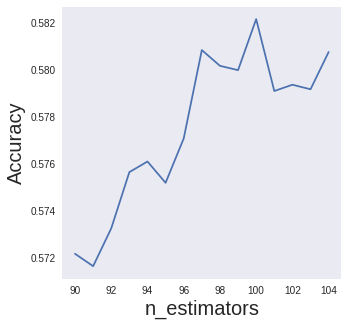

In [59]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =20);
axes.set_ylabel('Accuracy', fontsize = 20);
axes.grid()

Looks like default parameters are the best

In [60]:
rf = RandomForestRegressor(random_state = 11)

rf.fit(X_train, y_train)

print('Training R2:', rf.score(X_train, y_train))
print('Testing R2:', rf.score(X_test, y_test))

Training R2: 0.9441414036174137
Testing R2: 0.5821543238105094


Regression Metrics

In [61]:
rf_preds = rf.predict(X_test)

In [62]:
# Coefficient of Determination (R^2)

CoD = r2_score(y_test, rf_preds)
print('R2:', CoD)

R2: 0.5821543238105094


In [63]:
# Mean Absolute Error

MAE = mean_absolute_error(y_test, rf_preds)
print('MAE:', MAE)

MAE: 2852318.4007826084


In [64]:
# Mean Squared Error

MSE = mean_squared_error(y_test, rf_preds)
print('MSE:', MSE)

MSE: 18024427172232.7


In [65]:
# Root Mean Squared Error

RMSE = np.sqrt(MSE)
print('RMSE:', RMSE)

RMSE: 4245518.480967042


Overall not a very good model

# XGBoost Regressor

XGBoost Regressor without hypertuning

In [66]:
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

print('Training R2:', xgb.score(X_train, y_train))
print('Testing R2:', xgb.score(X_test, y_test))

[01:12:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Training R2: 0.9417966992898721
Testing R2: 0.5492983442975587


In [67]:
estimator_range = list(range(20, 40))

scores = []

for estimator in estimator_range:
    xgb = XGBRegressor(n_estimators=estimator,
                                 random_state=11,
                       objective = 'reg:squarederror')
    xgb.fit(X_train, y_train)
    scores.append(xgb.score(X_test, y_test))

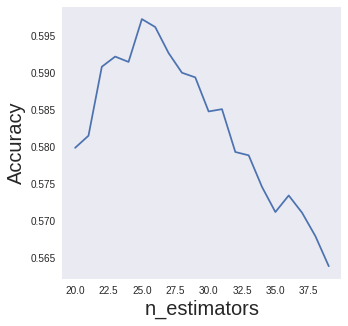

In [68]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(estimator_range, scores);
axes.set_xlabel('n_estimators', fontsize =20);
axes.set_ylabel('Accuracy', fontsize = 20);
axes.grid()

Looks like 25 is the best estimators

In [69]:
xgb = XGBRegressor(n_estimators= 25, 
                   objective = 'reg:squarederror', 
                   random_state = 11)

xgb.fit(X_train, y_train)

print('Training R2:', xgb.score(X_train, y_train))
print('Testing R2:', xgb.score(X_test, y_test))

Training R2: 0.7869195374113772
Testing R2: 0.5972329416597121


Regression Metrics

In [70]:
xgb_preds = xgb.predict(X_test)

CoD = r2_score(y_test, xgb_preds)
print('R2:', CoD)

MAE = mean_absolute_error(y_test, xgb_preds)
print('MAE:', MAE)

MSE = mean_squared_error(y_test, xgb_preds)
print('MSE:', MSE)

RMSE = np.sqrt(MSE)
print('RMSE:', RMSE)

R2: 0.5972329416597121
MAE: 2629292.8195652175
MSE: 17373987393222.924
RMSE: 4168211.534126228


Over fit but better than random forest

# KNN Regressor

KNN with no fine tuning

In [71]:
knn = KNeighborsRegressor()

knn.fit(X_train, y_train)

print('Training R2:', knn.score(X_train, y_train))
print('Testing R2:', knn.score(X_test, y_test))

Training R2: 0.42834785055142144
Testing R2: 0.09341557945627432


Really bad R2, can we make it better?

In [72]:
neighbors_range = list(range(1, 20))

scores = []

for neighbors in neighbors_range:
    knn = KNeighborsRegressor(n_neighbors = neighbors)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

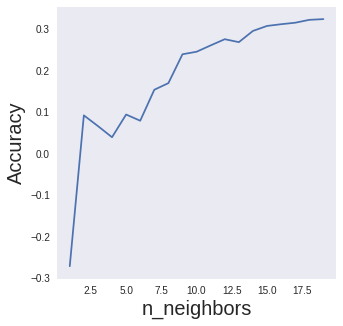

In [73]:
# Lets plot the results 
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5));
axes.plot(neighbors_range, scores);
axes.set_xlabel('n_neighbors', fontsize =20);
axes.set_ylabel('Accuracy', fontsize = 20);
axes.grid()

KNN Regressor is probably not the best type of model to use

# Voting Regressor

Let's try putting random forest and xgboost regressors in a voting regressor

In [74]:
vr = VotingRegressor(estimators = [('rf', rf), ('xgb', xgb)], weights=[1, 2])

vr.fit(X_train, y_train)

print('Training R2:', vr.score(X_train, y_train))
print('Testing R2:', vr.score(X_test, y_test))

Training R2: 0.8569698161863186
Testing R2: 0.6012994121837689


In [75]:
vr_preds = vr.predict(X_test)

CoD = r2_score(y_test, vr_preds)
print('R2:', CoD)

MAE = mean_absolute_error(y_test, vr_preds)
print('MAE:', MAE)

MSE = mean_squared_error(y_test, vr_preds)
print('MSE:', MSE)

RMSE = np.sqrt(MSE)
print('RMSE:', RMSE)

R2: 0.6012994121837689
MAE: 2637503.2358840583
MSE: 17198573823128.557
RMSE: 4147116.3262113295


Every metric except for MAE is better here with a voting regressor model

---------------------------------------------

# Neural Network

Now let's create a Neural Network using keras from tensorflow to better predict salaries

In [76]:
from keras.layers import Dense
from keras.models import Sequential
from keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping

Instantiate the model

In [77]:
model = Sequential()

Get the input shape

In [78]:
input_shape = X.shape[1]
input_shape


55

Add layers to the model

In [79]:
model.add(Dense(100, activation = 'relu', input_dim = input_shape))
model.add(Dense(90, activation = 'relu'))
model.add(Dense(1))

# compile the model (I used MSE as the loss fucntion and a metric of rmse)

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [RootMeanSquaredError(name = 'rmse')])

# Early Stopping 

early_stopping = EarlyStopping(patience = 10)

In [80]:
history = model.fit(X_train, 
                 y_train, 
                 validation_data = (X_test, y_test), 
                 epochs = 200,
                 callbacks = [early_stopping])

Epoch 1/200
11/11 [==============================] - 1s 19ms/step - loss: 101281519632384.0000 - rmse: 10063872.0000 - val_loss: 79742912954368.0000 - val_rmse: 8929889.0000
Epoch 2/200
11/11 [==============================] - 0s 4ms/step - loss: 101281494466560.0000 - rmse: 10063871.0000 - val_loss: 79742862622720.0000 - val_rmse: 8929886.0000
Epoch 3/200
11/11 [==============================] - 0s 4ms/step - loss: 101281427357696.0000 - rmse: 10063867.0000 - val_loss: 79742803902464.0000 - val_rmse: 8929883.0000
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 101281335083008.0000 - rmse: 10063863.0000 - val_loss: 79742703239168.0000 - val_rmse: 8929877.0000
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 101281184088064.0000 - rmse: 10063855.0000 - val_loss: 79742560632832.0000 - val_rmse: 8929869.0000
Epoch 6/200
11/11 [==============================] - 0s 4ms/step - loss: 101280940818432.0000 - rmse: 10063843.0000 - val_loss: 797423

Plotting the model's history

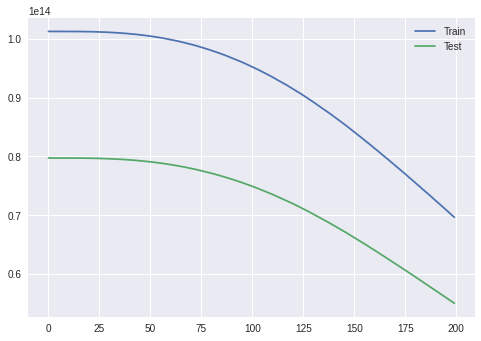

In [81]:
plt.plot(history.history['loss'], label = 'Train')
plt.plot(history.history['val_loss'], label = 'Test')
plt.legend();

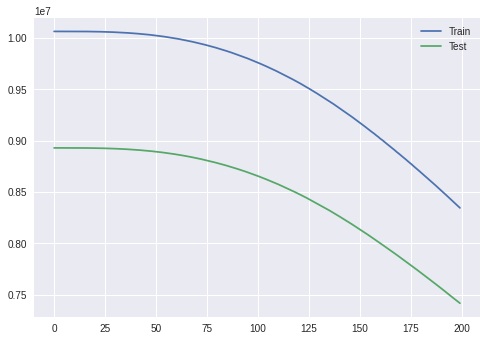

In [82]:
plt.plot(history.history['rmse'], label = 'Train')
plt.plot(history.history['val_rmse'], label = 'Test')
plt.legend();

Unfortunately, using a neural network in order to predict salaries did not yield better results than using the voting regressor model

In [83]:
NN_metrics = {'mse' : history.history['val_loss'], 'rmse' : history.history['val_rmse']}

results = pd.DataFrame(data = NN_metrics)
results

,mse,rmse
0,7.974291e+13,8929889.0
1,7.974286e+13,8929886.0
2,7.974280e+13,8929883.0
3,7.974270e+13,8929877.0
4,7.974256e+13,8929869.0
...,...,...
195,5.596295e+13,7480838.5
196,5.571860e+13,7464489.5
197,5.549659e+13,7449603.5
198,5.526078e+13,7433759.5


The voting regressor model yielded a better rmse of about compared to the neural network

# Conclusion

NBA player's advanced statistics cannot predict a player's salary. 

The machine learning models all yielded an rmse of a few million dollars off the actual salary.